#  Machine Learning - Prelims 
### Authors
- Kimly John Vergara
- Daniel Mark Wiegand

### Instructor
**Joan Anfernee Bajar Ng**

##  Classification Data Analysis

This notebook performs exploratory data analysis and preprocessing on a dataset to prepare it for machine learning classification.

## Load and Explore the Dataset

Load the dataset and perform initial exploration to understand its structure, data types, and identify missing values.

In [61]:
# import necessary librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Successfully installed")

In [62]:
df = pd.read_csv("prelim_dataset.csv")
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
(200, 6)


## Data Cleaning 


### No Unnecessary Columns

the cols Age,Sex,BP,Cholesterol,Na_to_K,Drug seems to have meaning. No cols necessary to drop

### Handle Missing Values and Check for Outliers

This section performs several important data quality checks:
- **Convert data types**: Ensure columns are in the correct data type
- **Handle missing values**: Identify and address missing data appropriately
- **Calculate skewness**: Identify distribution characteristics of numerical columns
- **Detect outliers**: Use boxplots and the IQR (Interquartile Range) method to identify outliers

In [63]:
# remove duplicates and check for missing values

df.drop_duplicates(inplace=True)
print(df.isna().sum()) 

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


no missing values

In [64]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(60*"=")
    print(f"Check Data Values of",df[col].value_counts())
    print(f'Uniques of {col}',df[col].value_counts().unique())
    print(f'NUniques of {col}',df[col].value_counts().nunique())


Check Data Values of Sex
M    104
F     96
Name: count, dtype: int64
Uniques of Sex [104  96]
NUniques of Sex 2
Check Data Values of BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Uniques of BP [77 64 59]
NUniques of BP 3
Check Data Values of Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Uniques of Cholesterol [103  97]
NUniques of Cholesterol 2
Check Data Values of Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
Uniques of Drug [91 54 23 16]
NUniques of Drug 4


### Check for Numerical Data skewness

Skewness Analysis:
Age                 :    0.03 - Fairly symmetric (right)
Na_to_K             :    1.04 - Highly skewed (right)


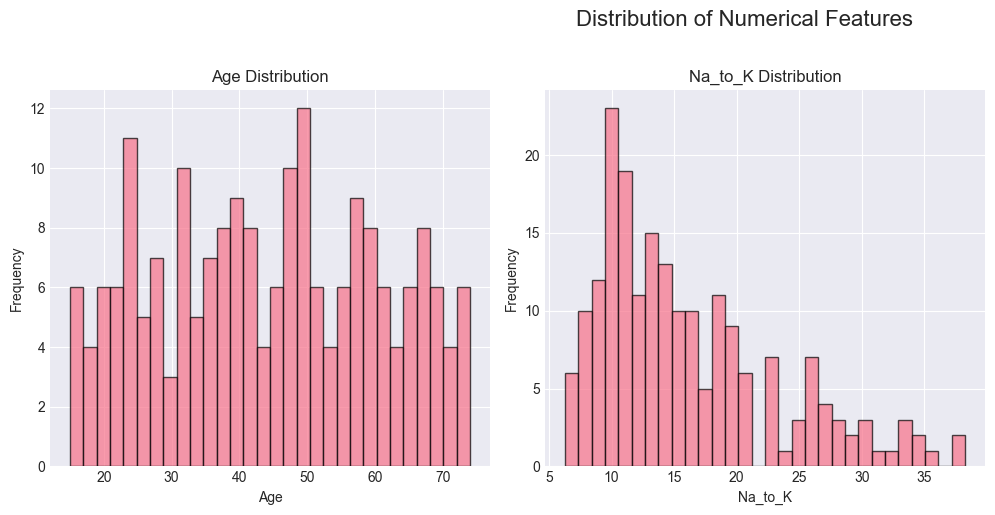

In [65]:
# check for each numerical skewness
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print("Skewness Analysis:")
print("=" * 60)
for col in numerical_cols:
    skewness = df[col].skew()
    
    # Interpret skewness
    if abs(skewness) < 0.5:
        interpretation = "Fairly symmetric"
    elif abs(skewness) < 1:
        interpretation = "Moderately skewed"
    else:
        interpretation = "Highly skewed"
    
    direction = "right" if skewness > 0 else "left" if skewness < 0 else "symmetric"
    
    print(f"{col:20s}: {skewness:7.2f} - {interpretation} ({direction})")

# Distribution of numerical features
num_cols_count = len(numerical_cols)
n_rows = (num_cols_count + 2) // 3  # Calculate rows needed
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)

# Flatten axes array for easier iteration
axes = axes.flatten() if num_cols_count > 3 else [axes] if num_cols_count == 1 else axes

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide extra subplots if any
for idx in range(num_cols_count, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()





Na_to_K seems to be skewed but since its some science stuffs so we should leave it as is

### Outlier Detection and Removal

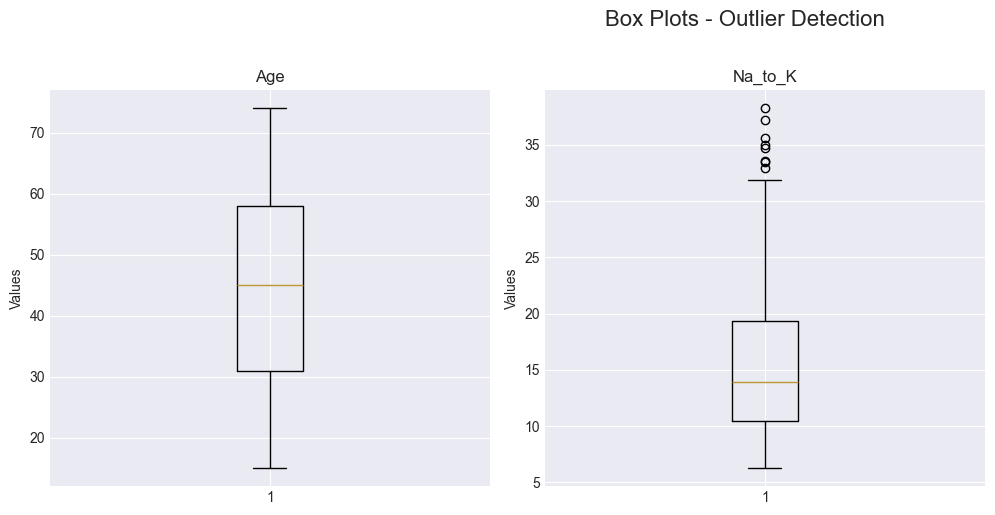

In [66]:
# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# 2. Box plots to visualize outliers
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
fig.suptitle('Box Plots - Outlier Detection', fontsize=16, y=1.02)

axes = axes.flatten() if num_cols_count > 3 else [axes] if num_cols_count == 1 else axes

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Values')

# Hide extra subplots if any
for idx in range(num_cols_count, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()



Based on the visualization of the boxplots
The age doesnt have any outliers, while the Na_to_K seems to have a few outliers 


IQR OUTLIER DETECTION
Q1 (25th percentile): 10.45
Q3 (75th percentile): 19.38
IQR (Interquartile Range): 8.93

Outlier bounds:
  Lower bound: -2.96
  Upper bound: 32.78

Outliers detected: 8 records (4.00%)
Records removed: 8
Records remaining: 192

AFTER OUTLIER REMOVAL


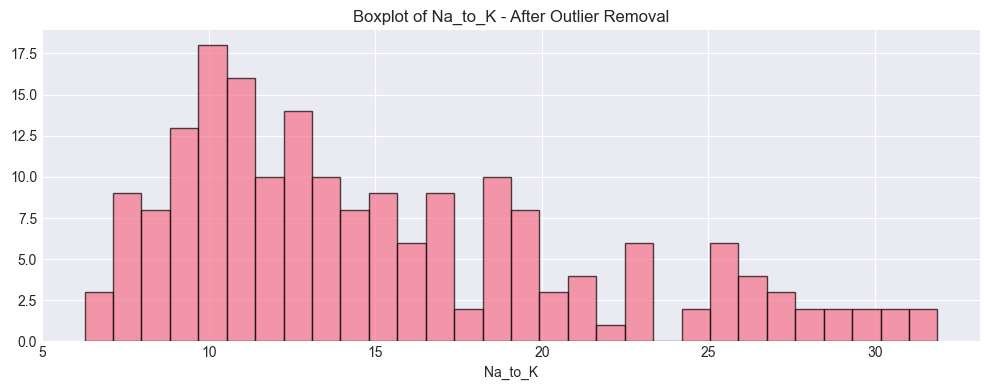

In [67]:
# IQR Method for Outlier Detection and Removal
print("\n" + "="*60)
print("IQR OUTLIER DETECTION")
print("="*60)

# Calculate Q1, Q3, and IQR
Q1 = df['Na_to_K'].quantile(0.25)
Q3 = df['Na_to_K'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR (Interquartile Range): {IQR:.2f}")

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nOutlier bounds:")
print(f"  Lower bound: {lower_bound:.2f}")
print(f"  Upper bound: {upper_bound:.2f}")

# Identify outliers
outliers = df[(df['Na_to_K'] < lower_bound) | (df['Na_to_K'] > upper_bound)]
print(f"\nOutliers detected: {len(outliers)} records ({len(outliers)/len(df)*100:.2f}%)")

# Remove outliers
df_before_removal = len(df)
df = df[(df['Na_to_K'] >= lower_bound) & (df['Na_to_K'] <= upper_bound)]
df_after_removal = len(df)

print(f"Records removed: {df_before_removal - df_after_removal}")
print(f"Records remaining: {df_after_removal}")


# Visualize after outlier removal
print("\n" + "="*60)
print("AFTER OUTLIER REMOVAL")
print("="*60)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.hist(df['Na_to_K'], bins=30, edgecolor='black', alpha=0.7)
ax.set_title('Boxplot of Na_to_K - After Outlier Removal')
ax.set_xlabel('Na_to_K')
plt.tight_layout()
plt.show()

The Na_to_K shows that there is no more extreme values

## Data Imbalance Analysis

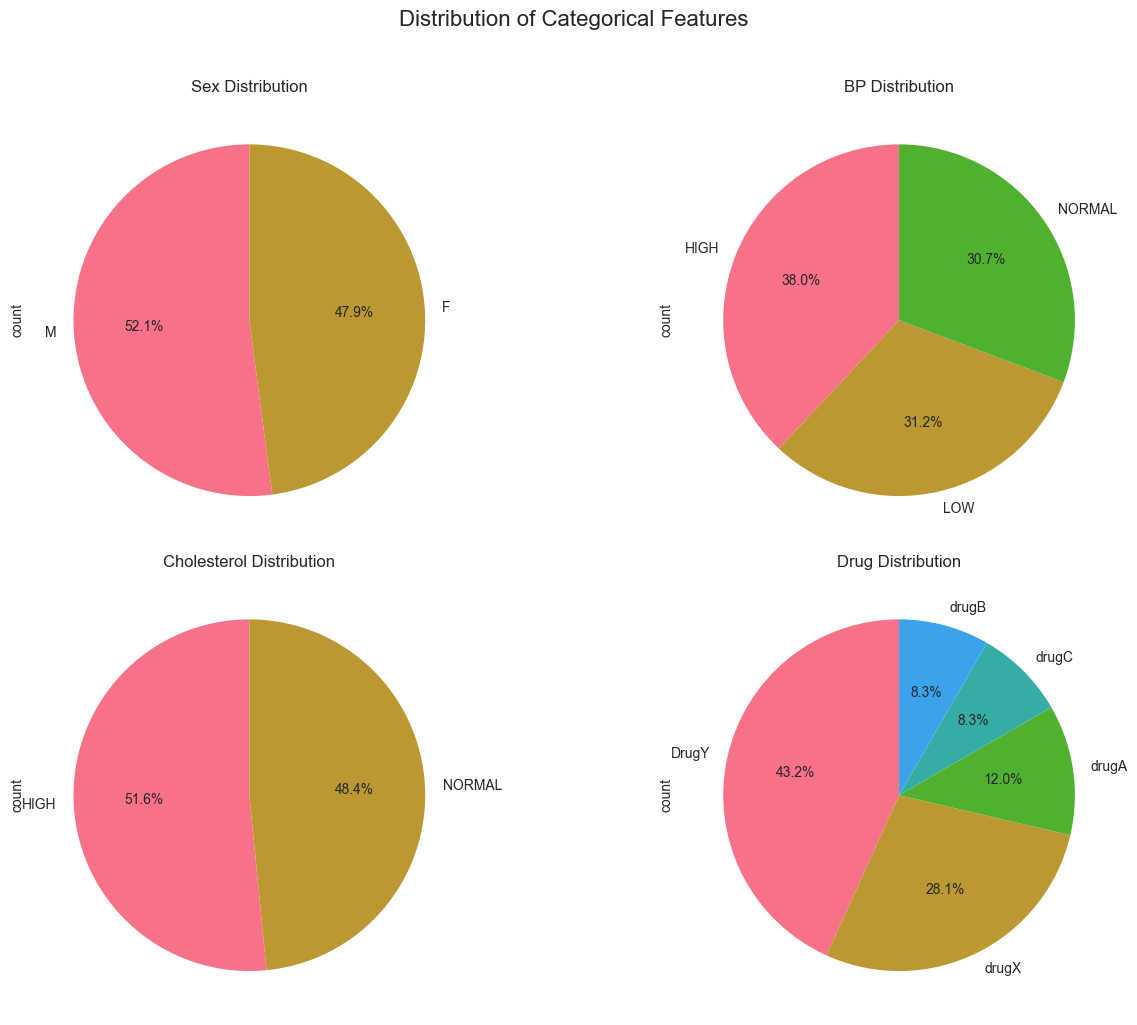

In [68]:

cat_cols_count = len(categorical_cols)
cat_rows = (cat_cols_count + 1) // 2  # Calculate rows needed
fig, axes = plt.subplots(cat_rows, 2, figsize=(14, 5*cat_rows))
fig.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)

axes = axes.flatten() if cat_cols_count > 2 else [axes] if cat_cols_count == 1 else axes

for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='pie', ax=axes[idx], autopct='%1.1f%%', startangle=90)
    axes[idx].set_title(f'{col} Distribution')

# Hide extra subplots if any
for idx in range(cat_cols_count, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

Categorical variables are well balanced except for drug distribution that is a bit imbalanced. No need for imbalance handling as it is not that significant

## Feature Engineering


Note: The darker the color the higher the occurence


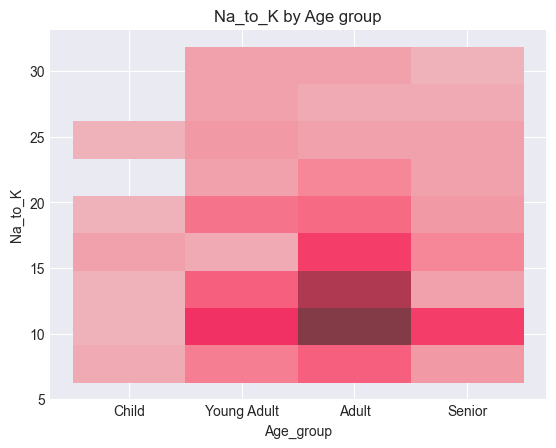

/var/folders/pd/lkt4mdn5155b_vtnpz6lblrh0000gn/T/ipykernel_17822/3115073978.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_group')['Na_to_K'].agg(['mean', 'median', 'count'])


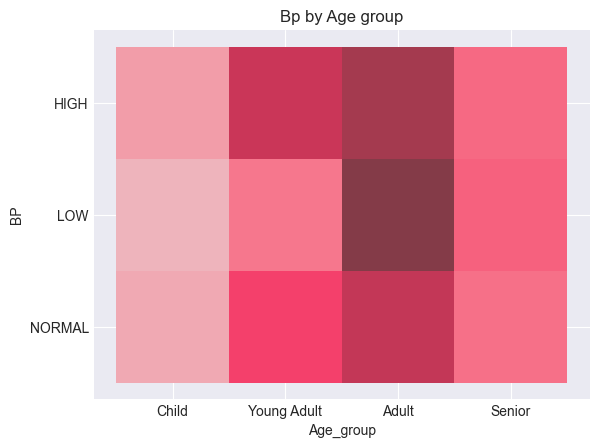

In [69]:
df['Age_group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100],
                         labels=['Child', 'Young Adult', 'Adult', 'Senior'])

print("Note: The darker the color the higher the occurence")
sns.histplot(x="Age_group", y='Na_to_K', data=df)
plt.title('Na_to_K by Age group')
plt.show()

df.groupby('Age_group')['Na_to_K'].agg(['mean', 'median', 'count'])

sns.histplot(x="Age_group", y='BP', data=df)
plt.title('Bp by Age group')
plt.show()




The visualization shows which age group had problems. It seems that Adults and Young Adults have problems. Maybe due to life stress or job pressure?

### Handle Remaining Missing Data

Check and address any remaining missing values after feature engineering.

In [70]:
df.info()
print(df.isna().sum())
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          192 non-null    int64   
 1   Sex          192 non-null    object  
 2   BP           192 non-null    object  
 3   Cholesterol  192 non-null    object  
 4   Na_to_K      192 non-null    float64 
 5   Drug         192 non-null    object  
 6   Age_group    192 non-null    category
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 10.9+ KB
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
Age_group      0
dtype: int64


(192, 7)

No missing values

## Preprocessing for Machine Learning

Now that we've completed our exploratory data analysis and feature engineering, we'll prepare the data for machine learning models.

### Steps:
1. **One-Hot Encoding**: Convert categorical variables to numerical format
2. **Drop Redundant Columns**: Remove columns not needed for modeling
3. **Train-Test Split**: Split data with stratification
4. **Feature Scaling**: Normalize numerical features for algorithms sensitive to scale

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

df["BP"] = le.fit_transform(df["BP"])
df["Cholesterol"] = le.fit_transform(df["Cholesterol"])
df["Sex"] =  np.where(df["Sex"] == "M", 1, 0)
df["Drug"] = le.fit_transform(df["Drug"])

age_group_dummies = pd.get_dummies(df['Age_group'], prefix='Age_group', drop_first=False).astype(int)
df.drop(columns=['Age_group', "Age"], inplace=True)

df = pd.concat([df, age_group_dummies], axis=1)
df.tail(20)

,Sex,BP,Cholesterol,Na_to_K,Drug,Age_group_Child,Age_group_Young Adult,Age_group_Adult,Age_group_Senior
177,1,2,0,19.011,0,0,1,0,0
178,1,2,0,15.969,0,0,0,1,0
179,0,2,0,15.891,0,0,0,0,1
180,0,0,1,22.818,0,0,1,0,0
181,0,2,0,13.884,4,0,0,1,0
182,0,1,1,11.686,4,0,1,0,0
183,0,0,1,15.490,0,0,0,1,0
185,0,2,1,25.893,0,0,0,1,0
186,1,0,0,9.849,2,0,0,0,1
187,1,0,0,10.403,1,0,0,1,0


Since there is already age-group. We dropped the age col. 

### Target variable selection

In [72]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug', axis=1)
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    192 non-null    int64  
 1   BP                     192 non-null    int64  
 2   Cholesterol            192 non-null    int64  
 3   Na_to_K                192 non-null    float64
 4   Drug                   192 non-null    int64  
 5   Age_group_Child        192 non-null    int64  
 6   Age_group_Young Adult  192 non-null    int64  
 7   Age_group_Adult        192 non-null    int64  
 8   Age_group_Senior       192 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 15.0 KB


### Scaling - to reduce gaps and centralize between the data

In [73]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    192 non-null    int64  
 1   BP                     192 non-null    int64  
 2   Cholesterol            192 non-null    int64  
 3   Na_to_K                192 non-null    float64
 4   Drug                   192 non-null    int64  
 5   Age_group_Child        192 non-null    int64  
 6   Age_group_Young Adult  192 non-null    int64  
 7   Age_group_Adult        192 non-null    int64  
 8   Age_group_Senior       192 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 15.0 KB


## Model Training and Evaluation

We'll train and evaluate multiple classification algorithms to predict the target variable. Each model will be evaluated using multiple metrics to understand their performance comprehensively.

### Models:
1. **Logistic Regression** - Linear baseline model
2. **Random Forest Classifier** - Ensemble of decision trees
3. **Gradient Boosting Classifier** - Sequential ensemble method
4. **Support Vector Machine (SVM)** - Kernel-based classifier


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
)
import time

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
}

# Store results
results = []

print("="*80)
print("MODEL TRAINING AND EVALUATION")
print("="*80)

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Training: {name}")
    print(f"{'='*80}")
    
    # Train the model
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics (with zero_division handling for imbalanced datasets)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0, average="micro")
    recall = recall_score(y_test, y_pred, zero_division=0, average="micro")
    f1 = f1_score(y_test, y_pred, zero_division=0, average="micro")

    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (s)': training_time
    })
    
    # Print results
    print(f"\nTraining Time: {training_time:.4f} seconds")
    print("\nPerformance Metrics:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(f"  True Negatives:  {cm[0][0]}")
    print(f"  False Positives: {cm[0][1]}")
    print(f"  False Negatives: {cm[1][0]}")
    print(f"  True Positives:  {cm[1][1]}")

print("\n" + "="*80)
print("✓ All models trained successfully!")
print("="*80)

MODEL TRAINING AND EVALUATION

Training: Logistic Regression

Training Time: 0.0076 seconds

Performance Metrics:
  Accuracy:  0.8621 (86.21%)
  Precision: 0.8621
  Recall:    0.8621
  F1-Score:  0.8621

Confusion Matrix:
[[22  0  1  0  2]
 [ 0  7  0  0  0]
 [ 0  3  2  0  0]
 [ 2  0  0  3  0]
 [ 0  0  0  0 16]]
  True Negatives:  22
  False Positives: 0
  False Negatives: 0
  True Positives:  7

Training: Random Forest

Training Time: 0.0594 seconds

Performance Metrics:
  Accuracy:  0.9483 (94.83%)
  Precision: 0.9483
  Recall:    0.9483
  F1-Score:  0.9483

Confusion Matrix:
[[25  0  0  0  0]
 [ 0  6  1  0  0]
 [ 0  2  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 16]]
  True Negatives:  25
  False Positives: 0
  False Negatives: 0
  True Positives:  6

Training: Gradient Boosting

Training Time: 0.1013 seconds

Performance Metrics:
  Accuracy:  0.9310 (93.10%)
  Precision: 0.9310
  Recall:    0.9310
  F1-Score:  0.9310

Confusion Matrix:
[[25  0  0  0  0]
 [ 0  5  2  0  0]
 [ 0  2  3  0 

## Model Comparison and Visualization


MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  Training Time (s)
      Random Forest  0.948276   0.948276 0.948276  0.948276           0.059359
  Gradient Boosting  0.931034   0.931034 0.931034  0.931034           0.101337
Logistic Regression  0.862069   0.862069 0.862069  0.862069           0.007574
                SVM  0.810345   0.810345 0.810345  0.810345           0.002343

🏆 BEST MODEL: Random Forest
Accuracy:  0.9483 (94.83%)
Precision: 0.9483
Recall:    0.9483
F1-Score:  0.9483


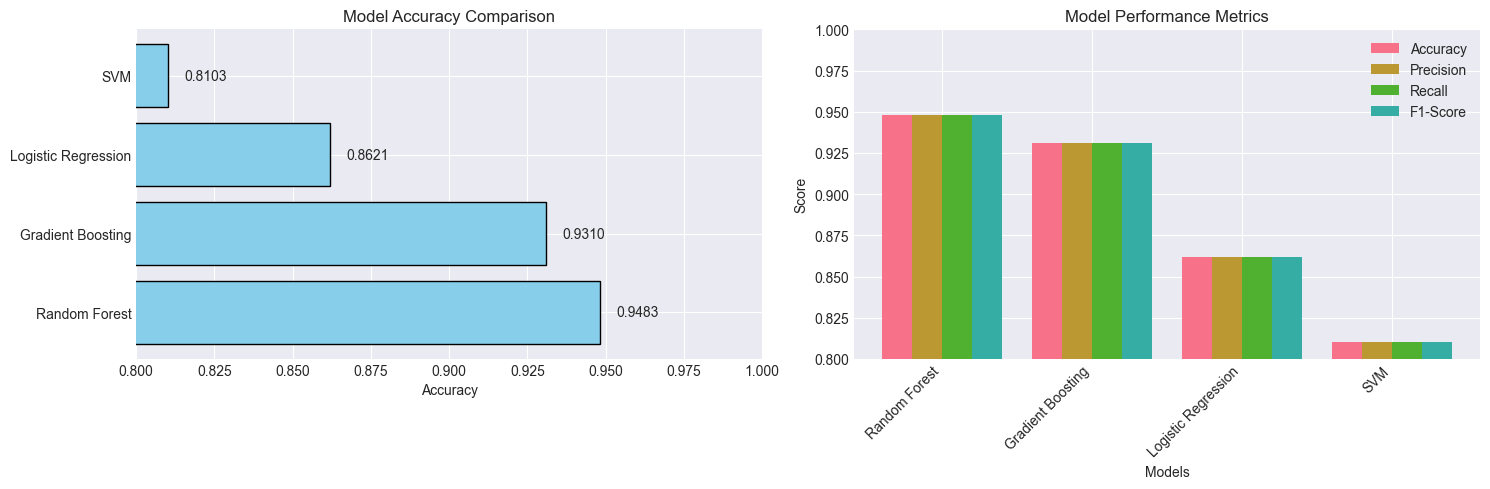

In [75]:
# Create results comparison table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*100)
print("MODEL PERFORMANCE COMPARISON")
print("="*100)
print(results_df.to_string(index=False))

# Find best model
best_model = results_df.iloc[0]
print("\n" + "="*100)
print(f"🏆 BEST MODEL: {best_model['Model']}")
print("="*100)
print(f"Accuracy:  {best_model['Accuracy']:.4f} ({best_model['Accuracy']*100:.2f}%)")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall:    {best_model['Recall']:.4f}")
print(f"F1-Score:  {best_model['F1-Score']:.4f}")
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
axes[0].barh(results_df['Model'], results_df['Accuracy'], color='skyblue', edgecolor='black')
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xlim([0.8, 1.0])
for i, v in enumerate(results_df['Accuracy']):
    axes[0].text(v + 0.005, i, f'{v:.4f}', va='center')

# Multiple metrics comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    offset = width * (i - 1.5)
    axes[1].bar(x + offset, results_df[metric], width, label=metric)

axes[1].set_xlabel('Models')
axes[1].set_ylabel('Score')
axes[1].set_title('Model Performance Metrics')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].set_ylim([0.8, 1.0])

plt.tight_layout()
plt.show()

The model comparison shows that tree-based models performed significantly better.